In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns
plt.style.use("seaborn-v0_8-darkgrid")

In [3]:
data = pd.read_csv("../data/customer_data.csv").set_index('customerID')
df = data.copy()

# Exploring data

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [6]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.shape

(7043, 20)


### Conclusion:
$\rightarrow$ no null values

In [8]:
df.duplicated().sum()

np.int64(22)

### Conclusion:
$\rightarrow$ no duplicated rows 

In [9]:
Numeric_cols=df.select_dtypes(include=['int64','float64']).columns

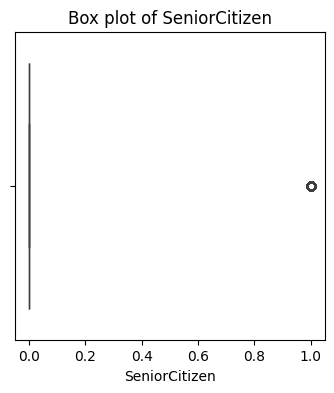

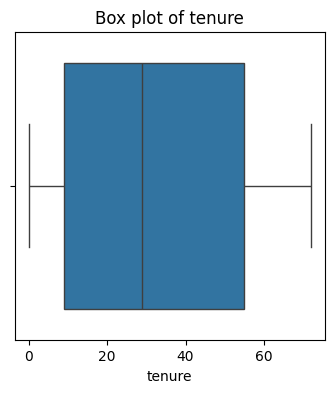

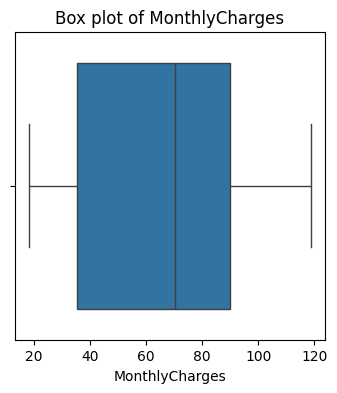

In [10]:
for col in Numeric_cols:
    plt.figure(figsize=(4,4))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

- The seniorCitizen boxplot is not normal, why?

In [11]:
df["SeniorCitizen"]

customerID
7590-VHVEG    0
5575-GNVDE    0
3668-QPYBK    0
7795-CFOCW    0
9237-HQITU    0
             ..
6840-RESVB    0
2234-XADUH    0
4801-JZAZL    0
8361-LTMKD    1
3186-AJIEK    0
Name: SeniorCitizen, Length: 7043, dtype: int64

- Let's change the ones to "yes" and the zeros to "no"

In [12]:
df['SeniorCitizen']=df['SeniorCitizen'].map({1:'Yes',0:'No'})

In [13]:
df["SeniorCitizen"]

customerID
7590-VHVEG     No
5575-GNVDE     No
3668-QPYBK     No
7795-CFOCW     No
9237-HQITU     No
             ... 
6840-RESVB     No
2234-XADUH     No
4801-JZAZL     No
8361-LTMKD    Yes
3186-AJIEK     No
Name: SeniorCitizen, Length: 7043, dtype: object

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
def get_uniques(column):
    return df[column].unique()

def uniques_dictionary(column):
    unique_values = get_uniques(column)
    uniques_dictionary = {}
    
    for value in unique_values:
        value_count = df[df[column] == value].shape[0]
        uniques_dictionary[value] = value_count
    
    return uniques_dictionary

dict = uniques_dictionary("MultipleLines")

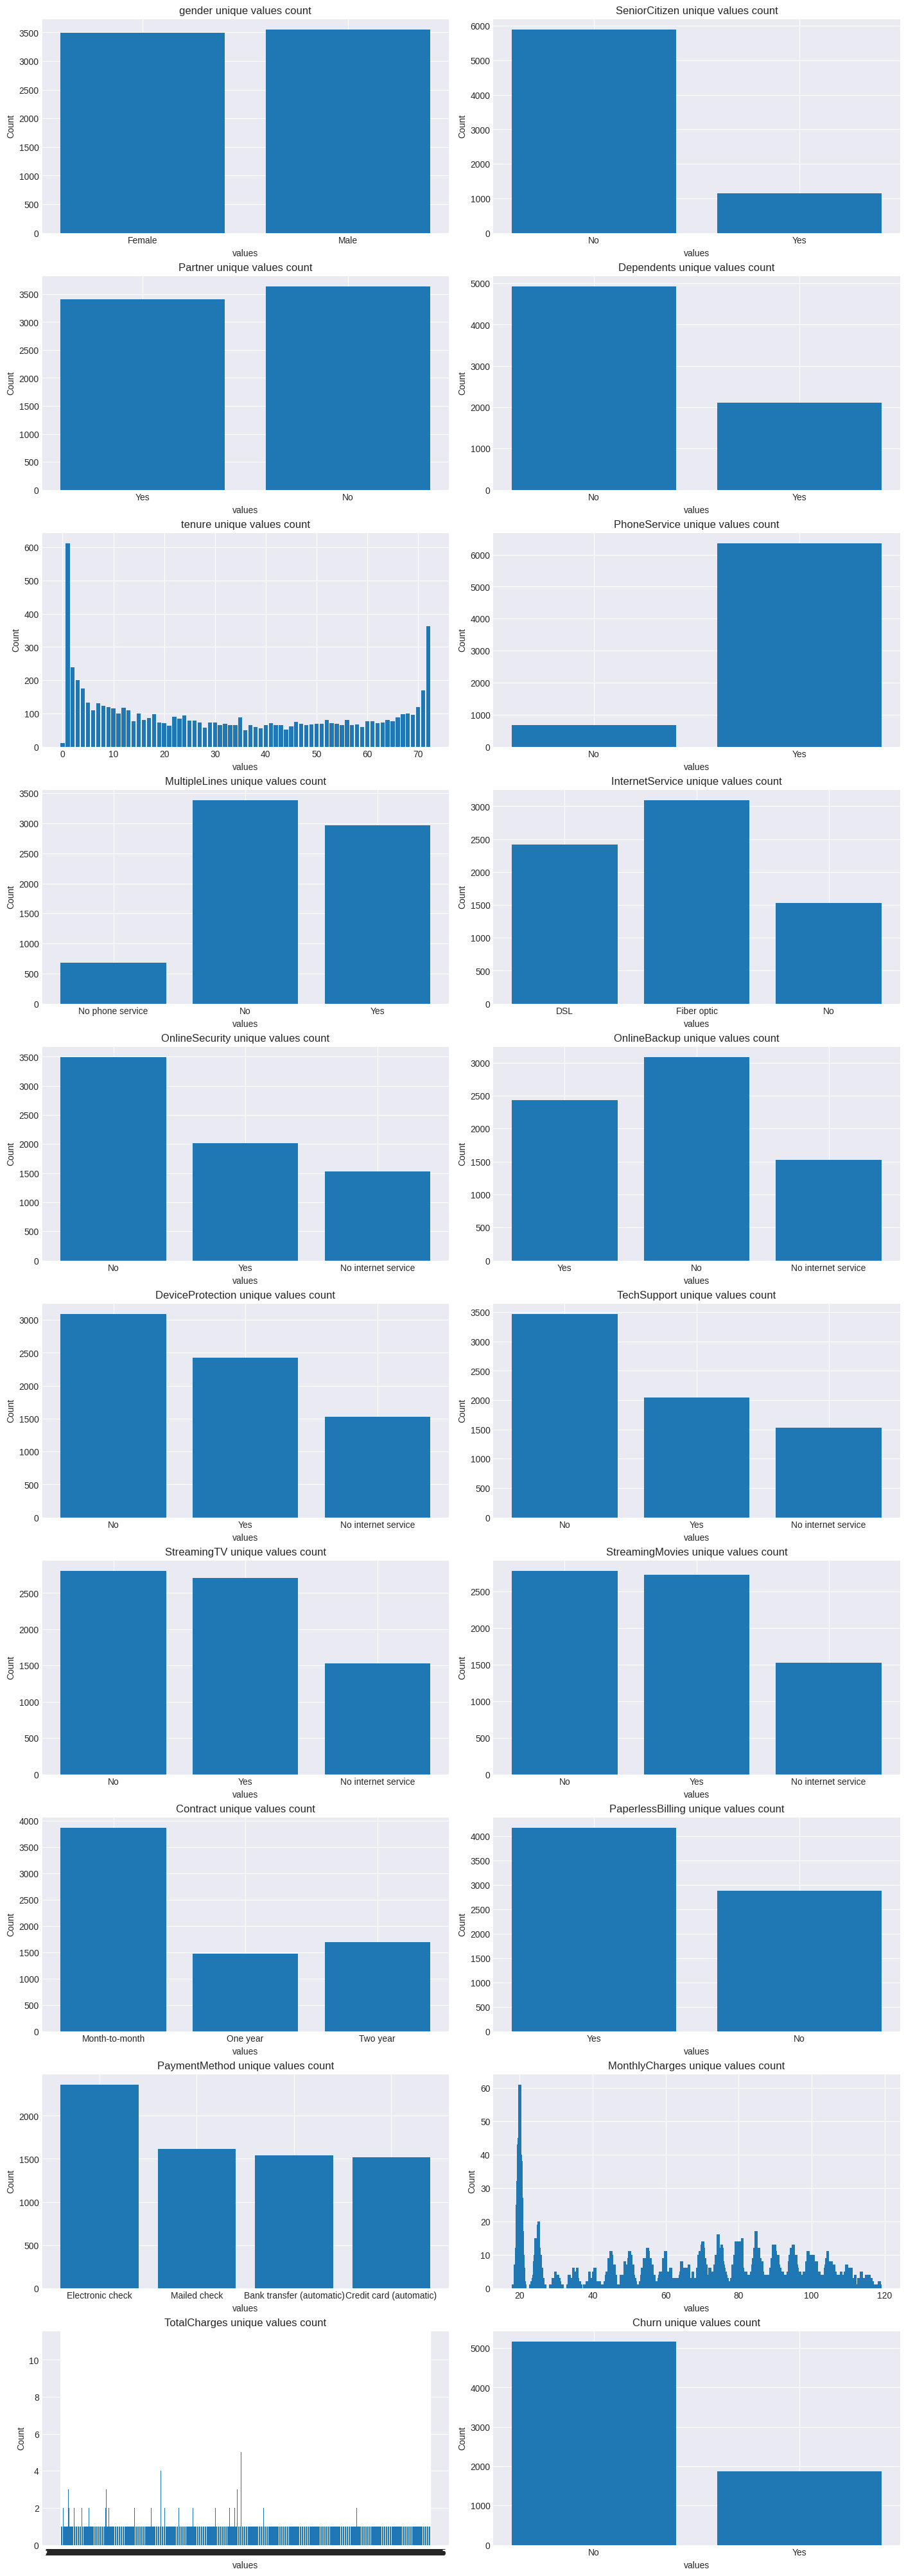

In [37]:
def plot_unique_values():
    columns = df.columns
    n_rows = (len(columns)+1)//2
    figure, axes = plt.subplots(n_rows ,2, figsize = (14,4*n_rows), constrained_layout=True)
    axes = axes.flatten()
    
    for i,column in enumerate(columns):
        value_counts = uniques_dictionary(column)
        
        axes[i].bar(value_counts.keys(), value_counts.values())
        axes[i].set_title(f"{column} unique values count")
        axes[i].set_ylabel("Count")
        axes[i].set_xlabel("values")
        
    plt.show()

plot_unique_values()